# Homework 0: Compustat and its Perils
### By David Sperlea, student ID: 11290333

In [168]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats.mstats import winsorize
import statistics as st

# Import data
df = pd.read_csv('cemhpws0nbx02kix.csv')

# Create lagged variables
df['lprice'] = df['prcc_f'].shift(1)
df['lat'] = df['at'].shift(1)

# Calculate and add financial ratios to dataset
df['book_leverage_1'] = (df['dlc'] + df['dltt']) / df['at']
df['book_leverage_2'] = df['lt'] / df['at']
df['market_value_of_equity'] = df['csho'] * df['prcc_f']
df['market_leverage'] = (df['dlc'] + df['dltt']) / (df['dlc'] + df['dltt'] + df['pstk'] + df['csho'] * df['prcc_f'])
df['market_to_book'] = (df['prcc_f'] * df['csho'] + df['dltt'] + df['dlc'] + df['pstkl'] - df['txditc']) / df['at']
df['asset_growth'] = df['at'] / df['lat'] - 1
df['asset_tangeability'] = df['ppent'] / df['at']
df['return_on_equity'] = df['ni'] / df['ceq']
df['profit_margin'] = df['ni'] / df['sale']
df['capex_ratio'] = df['capx'] / df['at']
df['dividend_yield'] = (df['dv'] / df['csho']) / (df['lprice'] / df['csho'])
df['dividend_payout_ratio'] = df['dv'] / df['ni']
df['total_payout_ratio'] = (df['dv'] + df['prstkc']) / df['ni']
df['ebit_interest_coverage'] = df['ebit'] / df['xint']
df['cash_holdings'] = df['che'] / df['at']
df['profitability'] = df['oibdp'] / df['at']

## Section 1. Understanding Data Issues

### Question 1


Initially, there is a total of 267,985 observations in the dataset.
After dropping all firms which are not headquartered in the U.S., there are 209,450 observations.


Text(0, 0.5, 'Number of US-Based Firms')

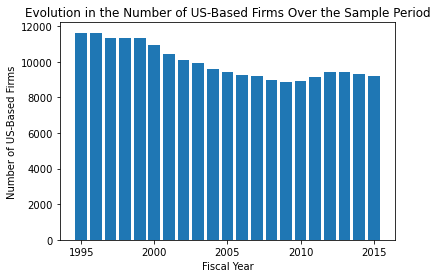

In [169]:
df1 = df

# Report the total number of observations in your data
nb_observations = len(df1)
print('Initially, there is a total of 267,985 observations in the dataset.')

# Identify all firms which are not headquartered in the U.S. and drop them from the data
df2 = df1[['fyear','conm','loc']]
df2 = df2.loc[df2["loc"] == 'USA'] # https://sparkbyexamples.com/pandas/pandas-drop-rows-with-condition/

# Report the new number of observations
df3 = len(df2)
print('After dropping all firms which are not headquartered in the U.S., there are 209,450 observations.')

# Plot the evolution in the number of U.S.-based firms over the sample period.
df4 = df2
count = (Counter(df4['fyear']))
df5 = pd.DataFrame.from_dict(count, orient='index')
df5=df5.reset_index()
df5=df5.dropna(subset=['index'])
df5.columns = ['Year', 'Nb']
plt.bar(df5['Year'], df5['Nb'])
plt.title('Evolution in the Number of US-Based Firms Over the Sample Period')
plt.xlabel('Fiscal Year')
plt.ylabel('Number of US-Based Firms')

### Question 2

In [170]:
# Winsorize each ratio at 1st and 99th percentile in each fiscal year
df6 = df1.loc[df1["loc"] == 'USA'] # Only keep data for U.S. firms
financial_ratios = pd.DataFrame([df6['book_leverage_1'], df6['book_leverage_2'], df6['market_value_of_equity'], df6['market_leverage'], df6['market_to_book'], df6['asset_growth'], df6['asset_tangeability'], df6['return_on_equity'], df6['profit_margin'], df6['capex_ratio'], df6['dividend_yield'], df6['dividend_payout_ratio'], df6['total_payout_ratio'], df6['ebit_interest_coverage'], df6['cash_holdings'], df6['profitability']])
array = np.array(financial_ratios)
winzorized_data = winsorize(array,(0.01,0.01)) # https://www.geeksforgeeks.org/winsorization/
df7 = pd.DataFrame(winzorized_data)

# Drop -inf and inf
df7.replace([np.inf, -np.inf], np.nan, inplace=True)

In [171]:
# Create a table with summary statistics that contains: the mean, the median, the minimum, the maximum, the standard deviation and the number of non-missing observations for each of the financial ratios.
Index = financial_ratios.reset_index()['index']
df8 = pd.DataFrame(index = Index, columns = ['Mean', 'Median', 'Minimum', 'Maximum', 'Standard Deviation', 'Number of Missing Observations'])
df8 = df8.reset_index()
df8.rename(columns = {'index':'Financial Ratios'}, inplace = True)

# Mean
mean = []
for i in range(0,16):
    mean.append(df7.iloc[i].mean())
df8['Mean'] = mean

# Median
median = []
for i in range(0,16):
    median.append(df7.iloc[i].median())
df8['Median'] = median

# Minimum
min = []
for i in range(0,16):
    min.append(df7.iloc[i].min())
df8['Minimum'] = min

# Maximum
max = []
for i in range(0,16):
    max.append(df7.iloc[i].max())
df8['Maximum'] = max

# Standard Deviation
std = []
for i in range(0,16):
    std.append(st.stdev(df7.iloc[i].fillna(0)))
df8['Standard Deviation'] = std

# Number of Missing Observations
nans = []
for i in range(0,16):
    nans.append(df7.iloc[i].isna().sum())
df8['Number of Missing Observations'] = nans

df8


,Financial Ratios,Mean,Median,Minimum,Maximum,Standard Deviation,Number of Missing Observations
0,book_leverage_1,1.076132,0.176411,-0.050045,5.319000e+03,28.255973,31665
1,book_leverage_2,3.266200,0.644124,0.000000,2.596897e+04,97.471088,30231
2,market_value_of_equity,2057.548039,132.480950,0.000000,1.819782e+06,11509.801169,50005
3,market_leverage,0.254718,0.172103,-0.048001,1.694105e+00,0.244410,73183
4,market_to_book,34.604985,1.255942,-0.793218,3.593750e+05,1287.580804,92872
5,asset_growth,257.606731,0.018129,-1.000000,7.023639e+06,23514.286769,34075
6,asset_tangeability,0.203736,0.093103,0.000000,1.666667e+00,0.237312,35271
7,return_on_equity,0.561596,0.079985,-21.864407,7.770333e+03,27.846463,53221
8,profit_margin,-1.593087,0.023837,-21.864407,5.617383e+03,18.112679,53626
9,capex_ratio,0.058165,0.027455,-21.864407,3.410000e+02,0.810755,62806


### Question 3

In [175]:
# Winsorized Data
transpose = df7.transpose()
transpose = transpose.reset_index()
df9 = df6.reset_index()
df9 = df9.drop(['book_leverage_1','book_leverage_2','market_value_of_equity','market_leverage','market_to_book','asset_growth','asset_tangeability','return_on_equity','profit_margin','capex_ratio','dividend_yield','dividend_payout_ratio','total_payout_ratio','ebit_interest_coverage','cash_holdings','profitability'], axis = 1)
df10 = pd.concat([df9, transpose], axis=1)
df10 = df10.drop('index', axis = 1)
df10

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,6,7,8,9,10,11,12,13,14,15
0,1004,19960531,1995.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,0.125229,0.078247,0.031708,0.017237,NaN,0.479390,0.576318,3.055953,0.076753,0.097196
1,1004,19970531,1996.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,0.134271,0.085512,0.039070,0.057200,0.360497,0.346406,0.697329,3.976451,0.097633,0.104189
2,1004,19980531,1997.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,0.123636,0.118521,0.045590,0.026090,0.294129,0.255714,0.255714,4.465020,0.025683,0.117811
3,1004,19990531,1998.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,0.143143,0.127811,0.045391,0.049724,0.354610,0.224977,0.406350,4.167663,0.011354,0.129975
4,1004,20000531,1999.0,INDL,C,D,STD,AIR,AAR CORP,USD,...,0.148452,0.103568,0.034328,0.030154,0.466734,0.262151,0.561613,3.015578,0.001675,0.120150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209445,319507,20151231,2015.0,INDL,C,D,STD,MTFB,MOTIF BIO PLC,USD,...,0.000000,-0.286546,-21.864407,0.000000,NaN,-0.000000,-0.000000,-21.864407,0.817953,-0.236226
209446,328795,20131231,2013.0,INDL,C,D,STD,ACA,ARCOSA INC,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209447,328795,20141231,2014.0,INDL,C,D,STD,ACA,ARCOSA INC,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209448,328795,20151231,2015.0,INDL,C,D,STD,ACA,ARCOSA INC,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df11 = df10[['fyear'], ['conm'], ]